<a href="https://colab.research.google.com/github/MacsEli/DocumentosDeClase/blob/main/An%C3%A1lisis_de_regresi%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston
from  sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
import matplotlib.pyplot as plt

In [ ]:
boston = load_boston()

In [ ]:
df = pd.DataFrame(boston.data, columns=boston.feature_names)

In [ ]:
type(boston)

sklearn.utils.Bunch

In [ ]:
boston

{'DESCR': ".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate p

In [ ]:
df['Price']=boston.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [ ]:
#Creando X y Y
#Queremos predecir el precio de las casas
x = df.drop('Price', axis=1)
y = df.Price

In [ ]:
#Crear nuestros Datasets de entrenamiento y de prueba
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size =.2, random_state=77)

In [ ]:
print(len(x))
print(len(y))
print(len(x_train))
print(len(x_test))
print(len(y_train))
print(len(y_test))

506
506
404
102
404
102


In [ ]:
#Modelo de regresión lineal

linreg = LinearRegression()
linreg.fit(x_train, y_train)
#Le decimo a linreg que tome x_train y y_Train como datos base para predecir


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
coeff_df = pd.DataFrame(linreg.coef_, x.columns, columns=['Coefficient'])
coeff_df

,Coefficient
CRIM,-0.104127
ZN,0.048031
INDUS,-0.011906
CHAS,3.064590
NOX,-19.885375
RM,3.811223
AGE,0.005227
DIS,-1.614652
RAD,0.332615
TAX,-0.012847


In [ ]:
#LInea de mejor ajuste
#y =  -0.086417 * CRIM (x_1) + 0.032834 * ZN (x_2)+.....


In [ ]:
#Obtener nuestro coeficiente de Determination R^2
train_score = linreg.score(x_train,y_train)
test_score = linreg.score(x_test,y_test)

In [ ]:
predicted = linreg.predict(x_test)

In [ ]:
df_pred = pd.DataFrame({'Actual': y_test, 'Predicted':predicted})

In [ ]:
df_pred

,Actual,Predicted
313,21.6,25.921594
139,17.8,16.100737
314,23.8,25.784393
89,28.7,31.468418
87,22.2,26.442077
...,...,...
136,17.4,15.524589
151,19.6,17.840441
177,24.6,29.830597
379,10.2,16.943577


In [ ]:
from sklearn import metrics
# Uun MAE pequeño, sugiere que es un buen modelo para la predicción
# Uno grande que tiene errores
metrics.mean_absolute_error(y_test,predicted)

3.3699009048812454

In [ ]:
train_score

0.7398204023122792

In [ ]:
#R^2
test_score

0.7269774874059808

/usr/local/lib/python3.6/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


ResidualsPlot(alpha=0.75,
              ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7fb3bc8cc390>,
              hist=False, line_color=None, model=None, test_color=None,
              train_color=None)

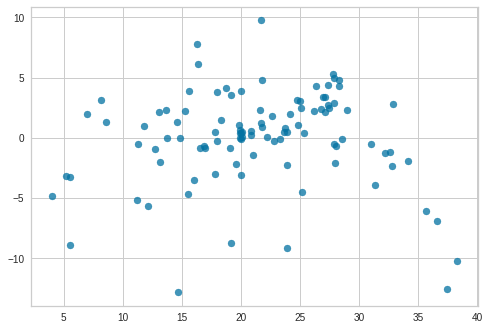

In [ ]:
from yellowbrick.regressor import ResidualsPlot
import seaborn as sns
visualizer = ResidualsPlot(linreg, hist=False)
visualizer.fit(x_test,y_test)


In [ ]:
#Regresióon Ridge
rr = Ridge()
rr.fit(x_train,y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [ ]:
rr100 = Ridge(alpha=100)
rr100.fit(x_train,y_train)

Ridge(alpha=100, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [ ]:
#OBtenemos R^2 de nuestros Ridge
ridge_train_score = rr.score(x_train,y_train)
ridge_test_score = rr.score(x_test,y_test)
ridge_train_score100 = rr100.score(x_train,y_train)
ridge_test_score100 = rr100.score(x_test,y_test)

In [ ]:
predicted_ridge = rr100.predict(x_test)

In [ ]:
df_predic_ridge = pd.DataFrame({'Actual':y_test, 'Predicted':predicted_ridge})
df_predic_ridge

,Actual,Predicted
313,21.6,26.862535
139,17.8,15.410713
314,23.8,26.099423
89,28.7,30.920117
87,22.2,26.520679
...,...,...
136,17.4,15.558216
151,19.6,23.877787
177,24.6,30.645282
379,10.2,15.996422


In [ ]:
#Train Score alto muy justo
print(train_score)
#Test score bajo significa que hay Overfitting
print(test_score)
print(ridge_train_score)
print(ridge_test_score)
print(ridge_train_score100)
print(ridge_test_score100)

0.7398204023122792
0.7269774874059808
0.7370295674009032
0.7306005477249629
0.7127107311732339
0.7117154080482149


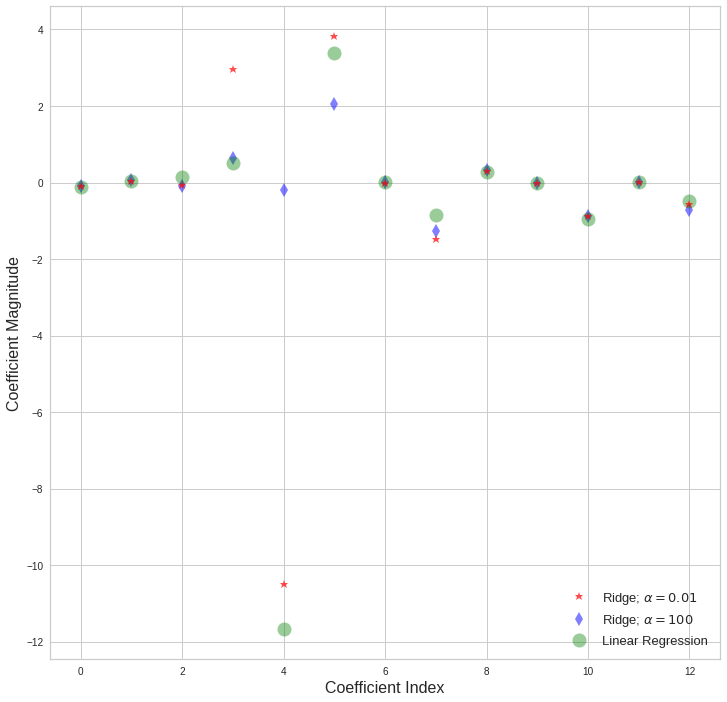

In [ ]:
fig = plt.figure(facecolor='w',figsize=(12, 12))
#Estoy graficando los coeficientes de Ridge con Alpha de 1
plt.plot(rr.coef_,alpha=0.7,linestyle='none',marker='*',markersize=9,\
         color='red',label=r'Ridge; $\alpha = 0.01$',zorder=7)
#Estoy graficando los coeficientes de Ridge con Alpha de 100
plt.plot(rr100.coef_,alpha=0.5,linestyle='none',marker='d',markersize=10,\
         color='blue',label=r'Ridge; $\alpha = 100$')
#Estoy graficando los coeficientes de Regresión lineal
plt.plot(linreg.coef_,alpha=0.4,linestyle='none',marker='o',markersize=14,\
         color='green',label='Linear Regression')
plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=13,loc=4)
plt.show()